In [3]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
sns.set_style('darkgrid')
sns.set_palette('muted', desat=.6)
sns.set_context("notebook", font_scale=1.0,
                rc={"lines.linewidth": 2.5})

root_dir = '/home/floyed/Metaplasticity__Unifying_Learning_and_Homeostatic_Plasticity_in_Spiking_Neural_Networks'
output_dir = '/home/floyed/evojax/examples/metaplasticity_plot'

In [21]:
meta_ant_dir = [
    f'{root_dir}/logs/RL_exp/PGPE-MetaStdpMLPPolicy-ant_dir-ABCD-20230621-192423',
    f'{root_dir}/logs/RL_exp/PGPE-MetaStdpMLPPolicy-ant_dir-ABCD-20230616-231220',
    f'{root_dir}/logs/RL_exp/PGPE-MetaStdpMLPPolicy-ant_dir-ABCD-20230615-231533',
    f'{root_dir}/logs/RL_exp/PGPE-MetaStdpMLPPolicy-ant_dir-ABCD-20230624-095746',
]

meta_halfcheetah_vel = [
    f'{root_dir}/logs/RL_exp/PGPE-MetaStdpMLPPolicy-halfcheetah_vel-ABCD-20230620-003335',
    f'{root_dir}/logs/RL_exp/PGPE-MetaStdpMLPPolicy-halfcheetah_vel-ABCD-20230614-220745',
    f'{root_dir}/logs/RL_exp/PGPE-MetaStdpMLPPolicy-halfcheetah_vel-ABCD-20230619-001809',
    f'{root_dir}/logs/RL_exp/PGPE-MetaStdpMLPPolicy-halfcheetah_vel-ABCD-20230624-095806',
]

meta_hopper_vel = [
    f'{root_dir}/logs/RL_exp/PGPE-MetaStdpMLPPolicy-hopper_vel-ABCD-20230621-192407',
    f'{root_dir}/logs/RL_exp/PGPE-MetaStdpMLPPolicy-hopper_vel-ABCD-20230620-213259',
    f'{root_dir}/logs/RL_exp/PGPE-MetaStdpMLPPolicy-hopper_vel-ABCD-20230620-003414',
    f'{root_dir}/logs/RL_exp/PGPE-MetaStdpMLPPolicy-hopper_vel-ABCD-20230621-124108',
]

# meta_humanoid_dir = [
#     f'{root_dir}/logs/RL_exp/PGPE-MetaStdpMLPPolicy-humanoid_dir-ABCD-20230620-213239',
#     f'{root_dir}/logs/RL_exp/PGPE-MetaStdpMLPPolicy-humanoid_dir-BD-20230620-003343',
#     f'{root_dir}/logs/RL_exp/PGPE-MetaStdpMLPPolicy-humanoid_dir-ABCD-20230620-213504',
#     f'{root_dir}/logs/RL_exp/PGPE-MetaStdpMLPPolicy-humanoid_vel-ABCD-20230622-192207',
# ]
meta_fetch = [
    f'{root_dir}/logs/RL_exp/PGPE-MetaStdpMLPPolicy-fetch-ABCD-20230622-212210',
    f'{root_dir}/logs/RL_exp/PGPE-MetaStdpMLPPolicy-fetch-ABCD-20230623-143515',
]

meta_swimmer_dir = [
    f'{root_dir}/logs/RL_exp/PGPE-MetaStdpMLPPolicy-swimmer_dir-ABCD-20230621-192411',
    f'{root_dir}/logs/RL_exp/PGPE-MetaStdpMLPPolicy-swimmer_dir-ABCD-20230622-192221',
    f'{root_dir}/logs/RL_exp/PGPE-MetaStdpMLPPolicy-swimmer_dir-ABCD-20230614-220749',
    f'{root_dir}/logs/RL_exp/PGPE-MetaStdpMLPPolicy-swimmer_dir-ABCD-20230624-095727',
]

meta_ur5e = [
    f'{root_dir}/logs/RL_exp/PGPE-MetaStdpMLPPolicy-ur5e-ABCD-20230621-124115',
    f'{root_dir}/logs/RL_exp/PGPE-MetaStdpMLPPolicy-ur5e-ABCD-20230622-192216',
    f'{root_dir}/logs/RL_exp/PGPE-MetaStdpMLPPolicy-ur5e-ABCD-20230621-192342',
    f'{root_dir}/logs/RL_exp/PGPE-MetaStdpMLPPolicy-ur5e-ABCD-20230620-003358',
]


base_ant_dir = [
    f'{root_dir}/logs/RL_exp/PGPE-MLPSnnPolicy-ant_dir--20230614-000507',
    f'{root_dir}/logs/RL_exp/PGPE-MLPSnnPolicy-ant_dir--20230622-113608',
]

base_halfcheetah_vel = [
    f'{root_dir}/logs/RL_exp/PGPE-MLPSnnPolicy-halfcheetah_vel--20230614-000505',
    f'{root_dir}/logs/RL_exp/PGPE-MLPSnnPolicy-halfcheetah_vel--20230622-113532',

]

base_hopper_vel = [
    f'{root_dir}/logs/RL_exp/PGPE-MLPSnnPolicy-hopper_vel--20230222-142648',
    f'{root_dir}/logs/RL_exp/PGPE-MLPSnnPolicy-hopper_vel--20230622-113649'
]

# base_humanoid_dir = [
#     f'{root_dir}/logs/RL_exp/PGPE-MLPSnnPolicy-humanoid_dir--20230621-175851',
#     f'{root_dir}/logs/RL_exp/PGPE-MLPSnnPolicy-humanoid_dir--20230622-113555',
# ]
base_fetch = [
    f'{root_dir}/logs/RL_exp/PGPE-MLPSnnPolicy-fetch--20230622-132230',
    f'{root_dir}/logs/RL_exp/PGPE-MLPSnnPolicy-fetch--20230623-143537',
    f'{root_dir}/logs/RL_exp/PGPE-MLPSnnPolicy-fetch--20230623-143555',
]

base_swimmer_dir = [
    f'{root_dir}/logs/RL_exp/PGPE-MLPSnnPolicy-swimmer_dir--20230224-112334',
    f'{root_dir}/logs/RL_exp/PGPE-MLPSnnPolicy-swimmer_dir--20230622-113637',
]

base_ur5e = [
    '/data/floyed/meta/train/PGPE-MLPSnnPolicy-ur5e--20230410-001319',
    '/data/floyed/meta/train/PGPE-MLPSnnPolicy-ur5e--20230622-113621',
]

env_names = ['ant_dir',  'swimmer_dir', 'halfcheetah_vel', 'hopper_vel', 'fetch', 'ur5e']

In [22]:
bd_ant_dir = [
    '/data/floyed/meta/train/PGPE-MetaStdpMLPPolicy-ant_dir-BD-20230621-124116',
    '/data/floyed/meta/train/PGPE-MetaStdpMLPPolicy-ant_dir-BD-20230620-213437',
    '/data/floyed/meta/train/PGPE-MetaStdpMLPPolicy-ant_dir-BD-20230614-220747',
    '/data/floyed/meta/train/PGPE-MetaStdpMLPPolicy-ant_dir-BD-20230619-001817'
]

bd_halfcheetah_vel = [
    '/data/floyed/meta/train/PGPE-MetaStdpMLPPolicy-halfcheetah_vel-BD-20230620-213234',
    '/data/floyed/meta/train/PGPE-MetaStdpMLPPolicy-halfcheetah_vel-BD-20230622-192203',
    '/data/floyed/meta/train/PGPE-MetaStdpMLPPolicy-halfcheetah_vel-BD-20230618-005153',
]

bd_hopper_vel = [
    '/data/floyed/meta/train/PGPE-MetaStdpMLPPolicy-hopper_vel-BD-20230616-231356',
    '/data/floyed/meta/train/PGPE-MetaStdpMLPPolicy-hopper_vel-BD-20230618-005225',
    '/data/floyed/meta/train/PGPE-MetaStdpMLPPolicy-hopper_vel-BD-20230615-231625',
]

bd_fetch = [
    '/data/floyed/meta/train/PGPE-MetaStdpMLPPolicy-fetch-BD-20230623-144356',
    '/data/floyed/meta/train/PGPE-MetaStdpMLPPolicy-fetch-BD-20230623-143751',
    '/data/floyed/meta/train/PGPE-MetaStdpMLPPolicy-fetch-BD-20230624-095603',
]

bd_swimmer_dir = [
    '/data/floyed/meta/train/PGPE-MetaStdpMLPPolicy-swimmer_dir-BD-20230621-124107',
    '/data/floyed/meta/train/PGPE-MetaStdpMLPPolicy-swimmer_dir-BD-20230616-231330',
    '/data/floyed/meta/train/PGPE-MetaStdpMLPPolicy-swimmer_dir-BD-20230615-231605',
    '/data/floyed/meta/train/PGPE-MetaStdpMLPPolicy-swimmer_dir-BD-20230620-003406',
]

bd_ur5e = [
    '/data/floyed/meta/train/PGPE-MetaStdpMLPPolicy-ur5e-BD-20230621-124310',
    '/data/floyed/meta/train/PGPE-MetaStdpMLPPolicy-ur5e-BD-20230614-220748',
    '/data/floyed/meta/train/PGPE-MetaStdpMLPPolicy-ur5e-BD-20230614-220748',
    '/data/floyed/meta/train/PGPE-MetaStdpMLPPolicy-ur5e-BD-20230615-231553',
]

xlims = [1500, 1500, 800, 1000, 1500, 1500]

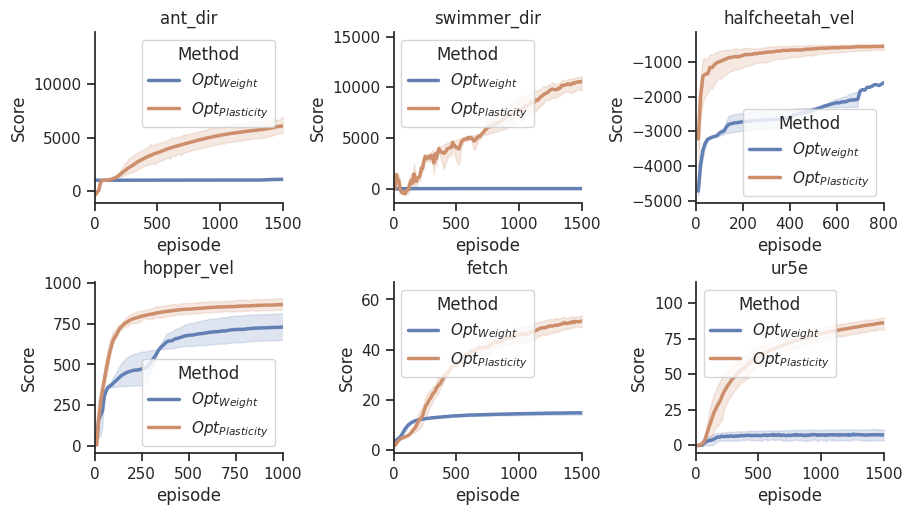

In [24]:
fig = plt.figure(figsize=(9, 5), dpi=100, constrained_layout=True)
spec = fig.add_gridspec(nrows=2, ncols=3, figure=fig)  #, width_ratios=[.2, 1, 1, 1, 1, .08, 1.6], height_ratios=[0.02, 1, 1, 0.01])

datas = []
for idx, env_name in enumerate(env_names):
    data = []
    for fname in eval('base_{}'.format(env_name)):
        df = pd.read_csv(os.path.join(fname, 'summary.csv'))
        df['Score'] = df['score_avg']
        df['episode'] = df['epoch']
        df['Method'] = '$Opt_{Weight}$'
        data.append(df)

    for fname in eval('meta_{}'.format(env_name)):
        df = pd.read_csv(os.path.join(fname, 'summary.csv'))
        df['Score'] = df['score_avg']
        df['episode'] = df['epoch']
        df['Method'] = '$Opt_{Plasticity}$'
        data.append(df)

    data = pd.concat(data)
    data = data.reset_index(drop=True)
    datas.append(data)

    print(env_name, 'Plasticity')
    print(data[(data['epoch'] == xlims[idx]) & (data['Method'] == '$Opt_{Plasticity}$')]['Score'].mean())
    print(data[(data['epoch'] == xlims[idx]) & (data['Method'] == '$Opt_{Plasticity}$')]['Score'].std())
    print(env_name, 'Weight')
    print(data[(data['epoch'] == xlims[idx]) & (data['Method'] == '$Opt_{Weight}$')]['Score'].mean())
    print(data[(data['epoch'] == xlims[idx]) &( data['Method'] == '$Opt_{Weight}$')]['Score'].std())

    ax = fig.add_subplot(spec[idx // 3, idx % 3])
    sns.lineplot(data=data, x='episode', y='Score', hue='Method')
    sns.despine()
    plt.title(env_name)
    plt.xlim(0, xlims[idx])
    sns.set_style("ticks")

plt.savefig(os.path.join(output_dir, 'cp_meta_base.pdf'), format='pdf', bbox_inches='tight')
plt.show()

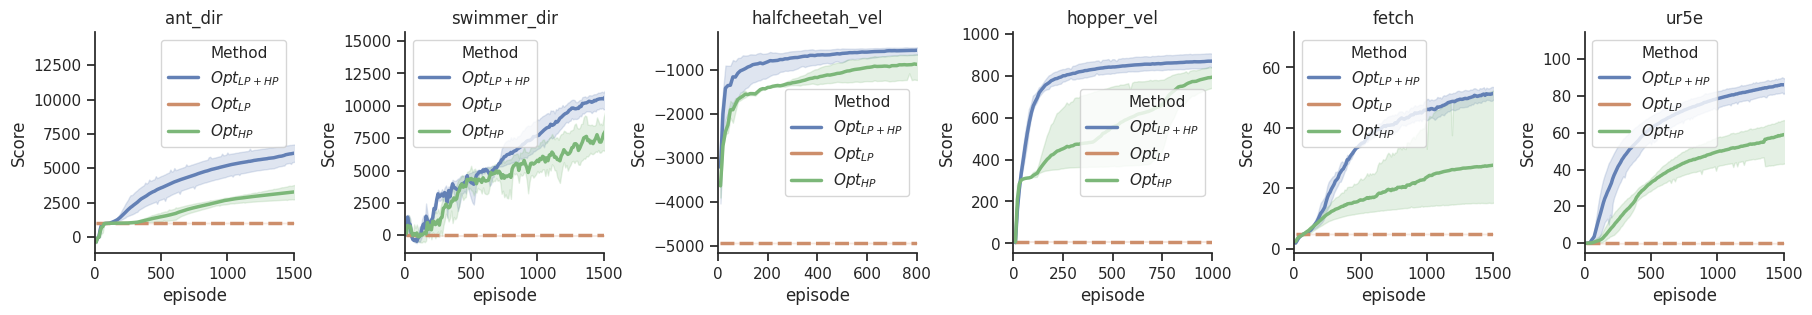

In [25]:
fig = plt.figure(figsize=(18, 3), dpi=100, constrained_layout=True)
spec = fig.add_gridspec(nrows=1, ncols=6, figure=fig)  #, width_ratios=[.2, 1, 1, 1, 1, .08, 1.6], height_ratios=[0.02, 1, 1, 0.01])
# 'ant_dir',  'swimmer_dir', 'halfcheetah_vel', 'hopper_vel', 'fetch', 'ur5e'
chance_level = [995, 0.12, -4946, 6.51, 4.74, 0.0]

datas = []
for idx, env_name in enumerate(env_names):
    data = []
    for fname in eval('meta_{}'.format(env_name)):
        df = pd.read_csv(os.path.join(fname, 'summary.csv'))
        df['Score'] = df['score_avg']
        df['episode'] = df['epoch']
        df['Method'] = '$Opt_{LP+HP}$'
        df['Type'] = False
        data.append(df)

    for fname in eval('bd_{}'.format(env_name)):
        df = pd.read_csv(os.path.join(fname, 'summary.csv'))
        df['Score'] = chance_level[idx]
        df['episode'] = df['epoch']
        df['Method'] = '$Opt_{LP}$'
        df['Type'] = True
        data.append(df)

    for fname in eval('bd_{}'.format(env_name)):
        df = pd.read_csv(os.path.join(fname, 'summary.csv'))
        df['Score'] = df['score_avg']
        df['episode'] = df['epoch']
        df['Method'] = '$Opt_{HP}$'
        df['Type'] = False
        data.append(df)

    data = pd.concat(data)
    data = data.reset_index(drop=True)
    datas.append(data)

    # print(env_name, 'ACD')
    # print(data[(data['epoch'] == xlims[idx]) & (data['Method'] == '$Opt_{ACD}$')]['Score'].mean())
    # print(data[(data['epoch'] == xlims[idx]) & (data['Method'] == '$Opt_{ACD}$')]['Score'].std())
    # print(env_name, 'BD')
    # print(data[(data['epoch'] == xlims[idx]) & (data['Method'] == '$Opt_{BD}$')]['Score'].mean())
    # print(data[(data['epoch'] == xlims[idx]) & (data['Method'] == '$Opt_{BD}$')]['Score'].std())

    ax = fig.add_subplot(spec[0, idx])
    ax = sns.lineplot(data=data, x='episode', y='Score', hue='Method', style='Type', ax=ax)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles=handles[:-3], labels=labels[:-3])
    sns.despine()
    plt.title(env_name)
    plt.xlim(0, xlims[idx])
    sns.set_style("ticks")

plt.savefig(os.path.join(output_dir, 'cp_meta_attri.pdf'), format='pdf', bbox_inches='tight')
plt.show()